In [2]:
import pandas as pd
import numpy as np
df=pd.read_parquet('./data/data_SinanDengue_2019_treated_part.parquet')

In [3]:
varList0=['FEBRE', 'MIALGIA', 'CEFALEIA','EXANTEMA', 'VOMITO','NAUSEA','DOR_COSTAS','CONJUNTVIT','ARTRITE',
'ARTRALGIA','PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','DIABETES','HEMATOLOG','HEPATOPAT','RENAL',
          'HIPERTENSA','ACIDO_PEPT','AUTO_IMUNE',
         'CS_SEXO','CS_GESTANT','SG_UF_NOT','CS_RACA','CS_ESCOL_N','NU_IDADE_N','ANO_NASC',
         'EVOLUCAO','HOSPITALIZ']

In [4]:
varList=['FEBRE', 'MIALGIA', 'CEFALEIA','EXANTEMA', 'VOMITO','NAUSEA','DOR_COSTAS','CONJUNTVIT','ARTRITE',
'ARTRALGIA','PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','DIABETES','HEMATOLOG','HEPATOPAT','RENAL',
          'HIPERTENSA','ACIDO_PEPT','AUTO_IMUNE']

In [5]:
varList0a=['FEBRE', 'MIALGIA', 'CEFALEIA','EXANTEMA', 'VOMITO','NAUSEA','DOR_COSTAS','CONJUNTVIT','ARTRITE',
'ARTRALGIA','PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','HOSPITALIZ']

In [6]:
df3=df.dropna(subset=varList0a,how='any')

In [7]:
df.shape


(2265800, 119)

In [8]:
df3.shape

(1534900, 119)

In [9]:
from stepmix.stepmix import StepMix

In [10]:
# Binary mixture model
model_13 = StepMix(n_components=13, measurement="bernoulli", structural='bernoulli', verbose=1, n_steps=3,random_state=123)
# Fit model
model_13.fit(df3.loc[:,varList],df3.loc[:,'HOSPITALIZ'])



Fitting StepMix...


Initializations (n_init) : 100%|█| 1/1 [21:15<00:00, 1275.97s/it, max_LL=-9.76e+
/home/tomoe/anaconda3/envs/2507DenguePy/lib/python3.13/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


MODEL REPORT
    Measurement model parameters
          model_name        binary                                                                                                
          class_no              0       1       2       3       4       5       6       7       8       9       10      11      12
          param variable                                                                                                          
          pis   ACIDO_PEPT  0.0073  0.0069  0.0028  0.0032  0.0055  0.0283  0.0021  0.0020  0.0029  0.0005  0.0648  0.0015  0.0051
                ARTRALGIA   0.4802  0.4077  0.2218  0.0964  0.3753  0.6351  0.0635  0.2245  0.0556  0.0000  0.2720  0.0244  0.2181
                ARTRITE     0.3221  0.6819  0.0502  0.0277  0.3469  0.6168  0.0963  0.0287  0.0127  0.0000  0.1887  0.0072  0.2013
                AUTO_IMUNE  0.0073  0.0050  0.0028  0.0039  0.0049  0.0232  0.0026  0.0018  0.0020  0.0005  0.0604  0.0008  0.0057
                CEFALEIA    1.0000  0

StepMix(n_components=13, n_steps=3, random_state=123, structural='bernoulli',
        verbose=1)

In [11]:
model_13.bic(df3.loc[:,varList],df3.loc[:,'HOSPITALIZ'])

np.float64(20135767.71722225)

In [12]:
df3['binary_pred']=model_13.predict(df3.loc[:,varList])

/tmp/ipykernel_245221/3300713533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['binary_pred']=model_13.predict(df3.loc[:,varList])


In [13]:
pd.crosstab(df3['HOSPITALIZ'], df3['binary_pred'],normalize='columns')

binary_pred,0,1,2,3,4,5,6,7,8,9,10,11,12
HOSPITALIZ,,,,,,,,,,,,,
0.0,0.953476,0.944567,0.924967,0.939745,0.964753,0.911314,0.956372,0.958685,0.887953,0.955366,0.88239,0.964345,0.938764
1.0,0.046524,0.055433,0.075033,0.060255,0.035247,0.088686,0.043628,0.041315,0.112047,0.044634,0.11761,0.035655,0.061236


In [14]:
pd.crosstab(df3['EVOLUCAO'], df3['binary_pred'],normalize='columns')

binary_pred,0,1,2,3,4,5,6,7,8,9,10,11,12
EVOLUCAO,,,,,,,,,,,,,
cura,0.999278,0.998040,0.997529,0.996475,0.999200,0.996999,0.998873,0.998926,0.993202,0.997571,0.987734,0.999026,0.998805
obito pelo agravo,0.000275,0.000296,0.000842,0.000797,0.000246,0.001725,0.000346,0.000327,0.001633,0.000310,0.004665,0.000205,0.000324
óbito em investigação,0.000066,0.000259,0.000171,0.000199,0.000079,0.000172,0.000077,0.000089,0.000502,0.000241,0.000708,0.000051,0.000061
óbito por outras causas,0.000380,0.001406,0.001458,0.002529,0.000475,0.001104,0.000705,0.000659,0.004663,0.001878,0.006893,0.000718,0.000810


In [15]:
import pickle
with open('./res/stepMix_gs/model_13.pkl', 'wb') as file:
    pickle.dump(model_13, file)

In [16]:
mmdf=model_13.get_mm_df()
mmdf=mmdf.reset_index(level=['model_name','param'],drop=True)

/home/tomoe/anaconda3/envs/2507DenguePy/lib/python3.13/site-packages/stepmix/stepmix.py:1224: FutureWarning: The provided callable <function mean at 0x734bec102520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [17]:
mmdf.reset_index(drop=False,inplace=True)

In [18]:
mmdf=mmdf.set_index('variable')

In [19]:
mmdf=model_13.get_mm_df()
mmdf=mmdf.reset_index()

/home/tomoe/anaconda3/envs/2507DenguePy/lib/python3.13/site-packages/stepmix/stepmix.py:1224: FutureWarning: The provided callable <function mean at 0x734bec102520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [20]:
mmdf

class_no,model_name,param,variable,0,1,2,3,4,5,6,7,8,9,10,11,12
0,binary,pis,ACIDO_PEPT,0.007343,0.006908,0.002807,3.169580e-03,5.539571e-03,0.028271,0.002146,0.002041,0.002890,5.398367e-04,0.064786,0.001464,0.005064
1,binary,pis,ARTRALGIA,0.480194,0.407683,0.221820,9.642548e-02,3.753259e-01,0.635088,0.063500,0.224536,0.055557,1.000000e-15,0.272004,0.024361,0.218070
2,binary,pis,ARTRITE,0.322113,0.681878,0.050181,2.770903e-02,3.469312e-01,0.616773,0.096348,0.028654,0.012706,1.000000e-15,0.188712,0.007173,0.201302
3,binary,pis,AUTO_IMUNE,0.007298,0.005050,0.002818,3.886264e-03,4.894768e-03,0.023161,0.002551,0.001796,0.002008,4.934615e-04,0.060355,0.000820,0.005748
4,binary,pis,CEFALEIA,1.000000,0.927268,0.942058,3.292415e-01,9.285825e-01,0.972443,0.870434,0.822141,0.452436,4.473966e-14,0.754691,0.899710,0.862462
5,binary,pis,CONJUNTVIT,0.052399,0.250197,0.021871,2.174007e-02,8.432235e-02,0.268025,0.028925,0.006544,0.017338,1.000000e-15,0.041751,0.001921,0.062681
6,binary,pis,DIABETES,0.032904,0.026477,0.005970,1.554406e-02,1.607232e-02,0.084270,0.012115,0.005741,0.007628,8.293038e-04,0.640789,0.004197,0.011217
7,binary,pis,DOR_COSTAS,0.841928,0.883261,0.347877,8.266981e-02,7.894666e-01,0.891473,0.521254,0.120326,0.044912,1.936365e-03,0.465650,0.028379,0.489636
8,binary,pis,DOR_RETRO,0.911530,0.427639,0.419115,1.043441e-01,6.329040e-01,0.813228,0.217980,0.411294,0.063987,1.000000e-15,0.357351,0.056915,0.593088
9,binary,pis,EXANTEMA,0.241628,0.320432,0.275359,4.325097e-01,2.743206e-01,0.686252,0.028468,0.185593,0.187670,6.608133e-02,0.188134,0.098883,0.532498


In [21]:
df=mmdf.iloc[:,4:17].T
df.columns=mmdf['variable']
df

variable,ACIDO_PEPT,ARTRALGIA,ARTRITE,AUTO_IMUNE,CEFALEIA,CONJUNTVIT,DIABETES,DOR_COSTAS,DOR_RETRO,EXANTEMA,...,HEMATOLOG,HEPATOPAT,HIPERTENSA,LACO,LEUCOPENIA,MIALGIA,NAUSEA,PETEQUIA_N,RENAL,VOMITO
class_no,,,,,,,,,,,,,,,,,,,,,
1,0.006908,4.076825e-01,6.818776e-01,0.005050,9.272680e-01,2.501971e-01,0.026477,0.883261,4.276391e-01,0.320432,...,0.004265,0.005145,0.114072,3.229976e-02,0.054720,8.905451e-01,0.895360,0.172973,0.005089,6.152014e-01
2,0.002807,2.218198e-01,5.018079e-02,0.002818,9.420583e-01,2.187098e-02,0.005970,0.347877,4.191152e-01,0.275359,...,0.002886,0.002936,0.041026,3.717124e-02,0.067437,9.203384e-01,0.940948,0.060576,0.001445,7.270935e-01
3,0.003170,9.642548e-02,2.770903e-02,0.003886,3.292415e-01,2.174007e-02,0.015544,0.082670,1.043441e-01,0.432510,...,0.004000,0.003774,0.046910,4.530747e-02,0.075916,4.084656e-01,0.078414,0.173016,0.002661,9.815961e-09
4,0.005540,3.753259e-01,3.469312e-01,0.004895,9.285825e-01,8.432235e-02,0.016072,0.789467,6.329040e-01,0.274321,...,0.004124,0.003850,0.092605,3.400117e-02,0.081882,9.471906e-01,0.278683,0.105439,0.002411,6.964236e-12
5,0.028271,6.350878e-01,6.167728e-01,0.023161,9.724430e-01,2.680255e-01,0.084270,0.891473,8.132275e-01,0.686252,...,0.026240,0.026378,0.191851,3.761711e-01,0.378288,9.746527e-01,0.885503,0.736059,0.023822,5.367434e-01
6,0.002146,6.349986e-02,9.634780e-02,0.002551,8.704341e-01,2.892491e-02,0.012115,0.521254,2.179798e-01,0.028468,...,0.001986,0.001920,0.064598,1.486734e-02,0.006724,5.932632e-01,0.531183,0.083735,0.002779,2.822453e-01
7,0.002041,2.245362e-01,2.865432e-02,0.001796,8.221410e-01,6.543521e-03,0.005741,0.120326,4.112942e-01,0.185593,...,0.001575,0.001673,0.033524,1.230629e-02,0.044416,8.549534e-01,0.182426,0.029945,0.000679,7.248785e-02
8,0.002890,5.555717e-02,1.270561e-02,0.002008,4.524359e-01,1.733799e-02,0.007628,0.044912,6.398726e-02,0.187670,...,0.003284,0.003622,0.023952,1.616387e-02,0.056536,4.097189e-01,0.440709,0.073109,0.002402,8.453572e-01
9,0.000540,1.000000e-15,1.000000e-15,0.000493,4.473966e-14,1.000000e-15,0.000829,0.001936,1.000000e-15,0.066081,...,0.000496,0.000861,0.001540,1.000000e-15,0.000047,1.000000e-15,0.001717,0.019986,0.000239,1.000000e-15


In [22]:
df=df.reset_index()


In [23]:
df.columns

Index(['class_no', 'ACIDO_PEPT', 'ARTRALGIA', 'ARTRITE', 'AUTO_IMUNE',
       'CEFALEIA', 'CONJUNTVIT', 'DIABETES', 'DOR_COSTAS', 'DOR_RETRO',
       'EXANTEMA', 'FEBRE', 'HEMATOLOG', 'HEPATOPAT', 'HIPERTENSA', 'LACO',
       'LEUCOPENIA', 'MIALGIA', 'NAUSEA', 'PETEQUIA_N', 'RENAL', 'VOMITO'],
      dtype='object', name='variable')

In [24]:
df

variable,class_no,ACIDO_PEPT,ARTRALGIA,ARTRITE,AUTO_IMUNE,CEFALEIA,CONJUNTVIT,DIABETES,DOR_COSTAS,DOR_RETRO,...,HEMATOLOG,HEPATOPAT,HIPERTENSA,LACO,LEUCOPENIA,MIALGIA,NAUSEA,PETEQUIA_N,RENAL,VOMITO
0,1,0.006908,4.076825e-01,6.818776e-01,0.005050,9.272680e-01,2.501971e-01,0.026477,0.883261,4.276391e-01,...,0.004265,0.005145,0.114072,3.229976e-02,0.054720,8.905451e-01,0.895360,0.172973,0.005089,6.152014e-01
1,2,0.002807,2.218198e-01,5.018079e-02,0.002818,9.420583e-01,2.187098e-02,0.005970,0.347877,4.191152e-01,...,0.002886,0.002936,0.041026,3.717124e-02,0.067437,9.203384e-01,0.940948,0.060576,0.001445,7.270935e-01
2,3,0.003170,9.642548e-02,2.770903e-02,0.003886,3.292415e-01,2.174007e-02,0.015544,0.082670,1.043441e-01,...,0.004000,0.003774,0.046910,4.530747e-02,0.075916,4.084656e-01,0.078414,0.173016,0.002661,9.815961e-09
3,4,0.005540,3.753259e-01,3.469312e-01,0.004895,9.285825e-01,8.432235e-02,0.016072,0.789467,6.329040e-01,...,0.004124,0.003850,0.092605,3.400117e-02,0.081882,9.471906e-01,0.278683,0.105439,0.002411,6.964236e-12
4,5,0.028271,6.350878e-01,6.167728e-01,0.023161,9.724430e-01,2.680255e-01,0.084270,0.891473,8.132275e-01,...,0.026240,0.026378,0.191851,3.761711e-01,0.378288,9.746527e-01,0.885503,0.736059,0.023822,5.367434e-01
5,6,0.002146,6.349986e-02,9.634780e-02,0.002551,8.704341e-01,2.892491e-02,0.012115,0.521254,2.179798e-01,...,0.001986,0.001920,0.064598,1.486734e-02,0.006724,5.932632e-01,0.531183,0.083735,0.002779,2.822453e-01
6,7,0.002041,2.245362e-01,2.865432e-02,0.001796,8.221410e-01,6.543521e-03,0.005741,0.120326,4.112942e-01,...,0.001575,0.001673,0.033524,1.230629e-02,0.044416,8.549534e-01,0.182426,0.029945,0.000679,7.248785e-02
7,8,0.002890,5.555717e-02,1.270561e-02,0.002008,4.524359e-01,1.733799e-02,0.007628,0.044912,6.398726e-02,...,0.003284,0.003622,0.023952,1.616387e-02,0.056536,4.097189e-01,0.440709,0.073109,0.002402,8.453572e-01
8,9,0.000540,1.000000e-15,1.000000e-15,0.000493,4.473966e-14,1.000000e-15,0.000829,0.001936,1.000000e-15,...,0.000496,0.000861,0.001540,1.000000e-15,0.000047,1.000000e-15,0.001717,0.019986,0.000239,1.000000e-15
9,10,0.064786,2.720045e-01,1.887123e-01,0.060355,7.546909e-01,4.175126e-02,0.640789,0.465650,3.573506e-01,...,0.070099,0.078304,0.823913,6.435708e-02,0.123125,8.395640e-01,0.486219,0.100174,0.082908,2.440715e-01


<Figure size 2000x800 with 0 Axes>

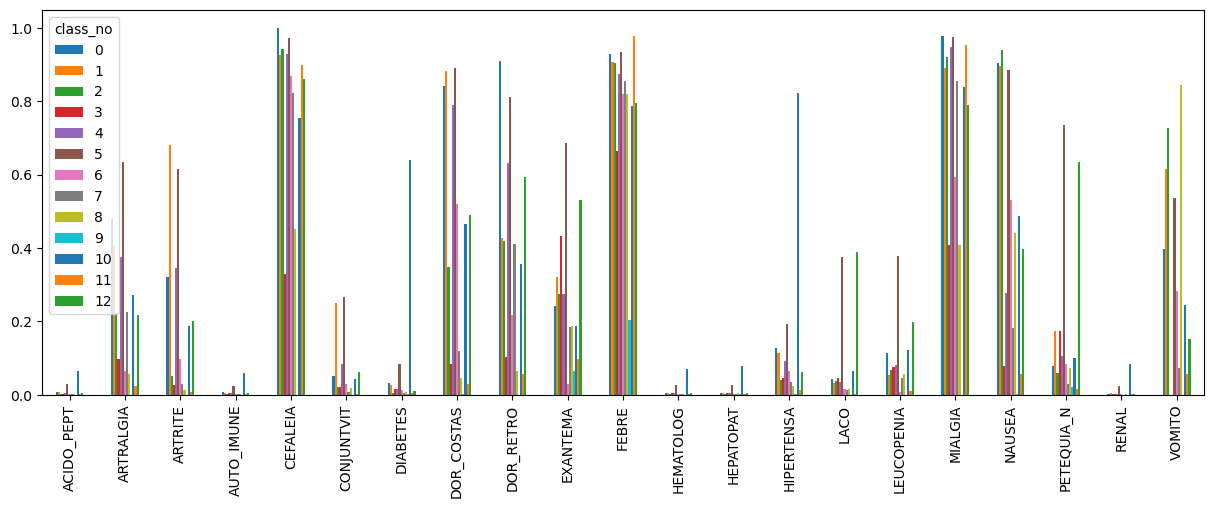

In [25]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ax=mmdf.drop(['model_name','param','variable'],axis=1).plot(kind='bar',figsize=(15,5))
ax.set_xticklabels(mmdf.variable)
plt.savefig('./res/stepMix_gs/sign_comorb/c13/allvar.png', bbox_inches='tight')
plt.show()

In [26]:
mmdf.columns

Index(['model_name', 'param', 'variable', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
       12],
      dtype='object', name='class_no')

<Figure size 2000x800 with 0 Axes>

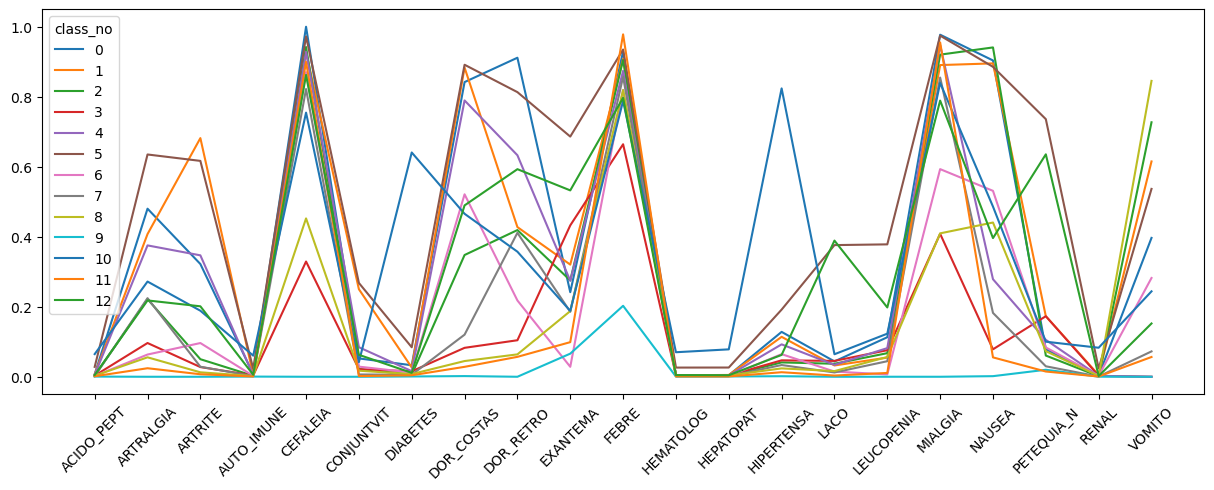

In [27]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ax=mmdf.drop(['model_name','param','variable'],axis=1).plot(kind='line',figsize=(15,5))
#ax.set_xticklabels(varList)
plt.xticks(ticks=range(len(varList)), labels=mmdf.variable, rotation=45)
plt.savefig('./res/stepMix_gs/sign_comorb/c13/allvar_line.png', bbox_inches='tight')
plt.show()

In [28]:
mmdf=mmdf.reset_index(drop=False)

In [29]:
len(varList)

21

In [30]:
mmdf.to_csv('./res/stepMix_gs/model13_par.csv')

In [31]:
ticks=[x for x in mmdf.columns[1:].values]

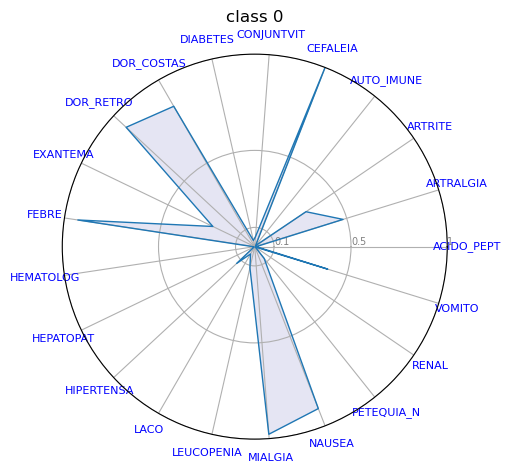

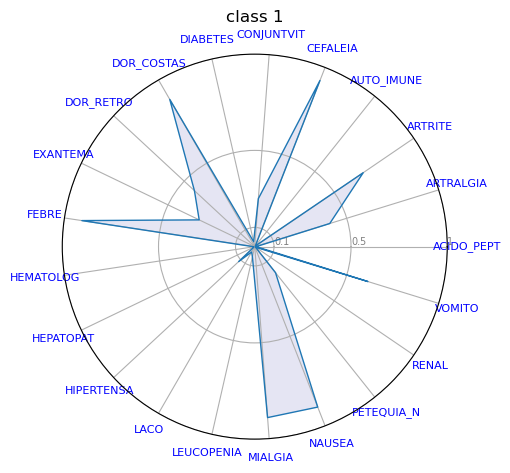

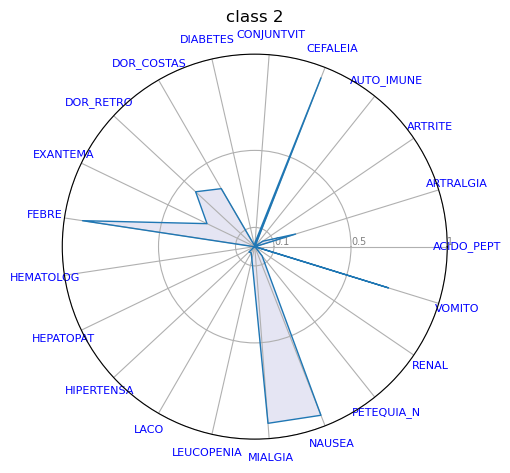

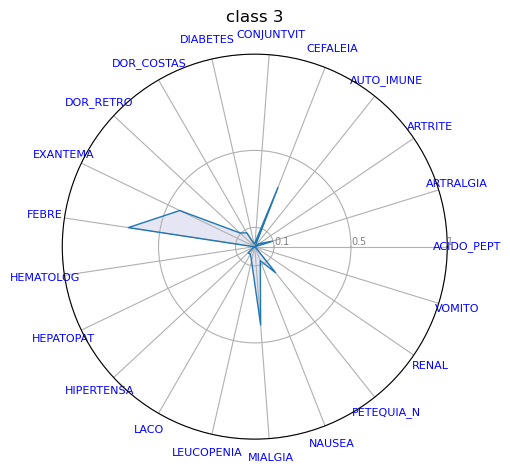

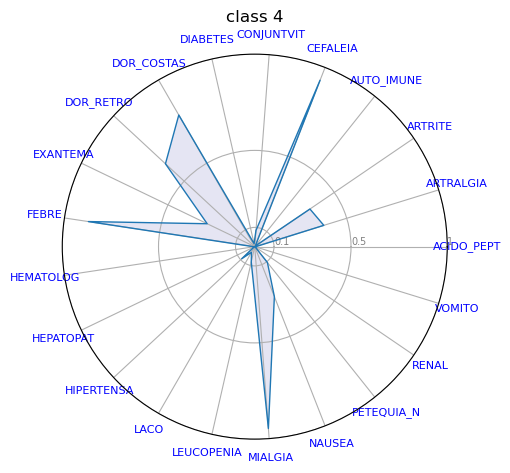

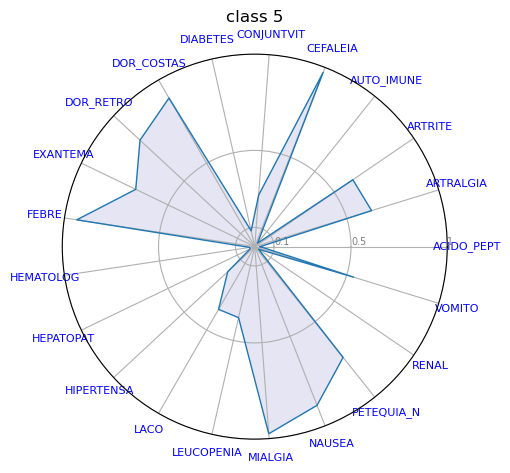

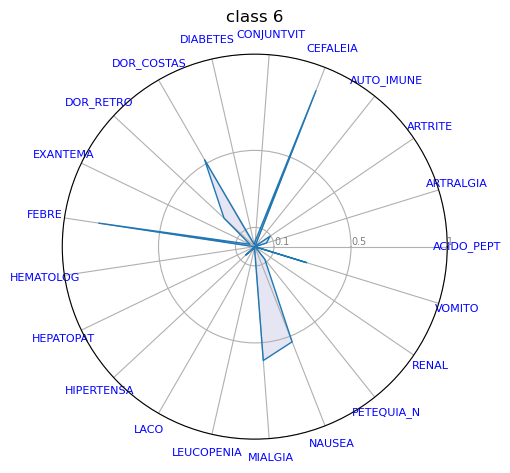

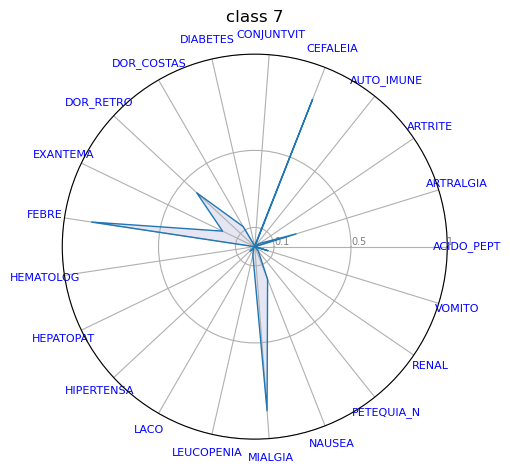

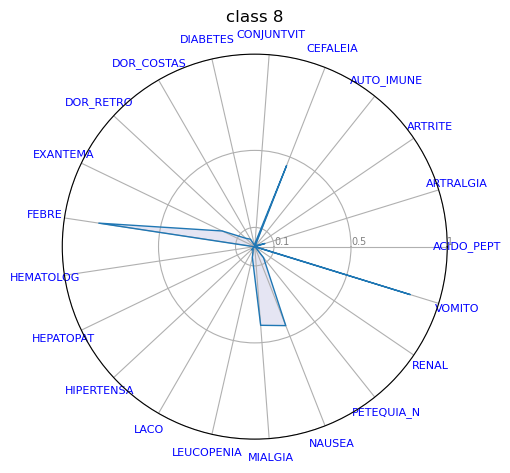

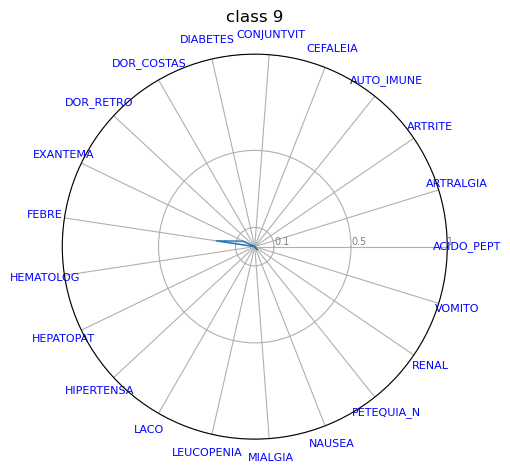

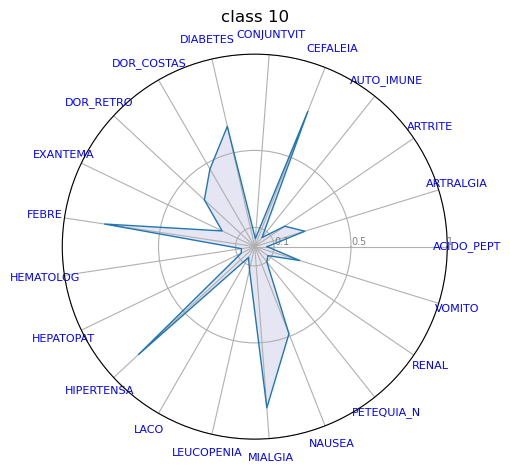

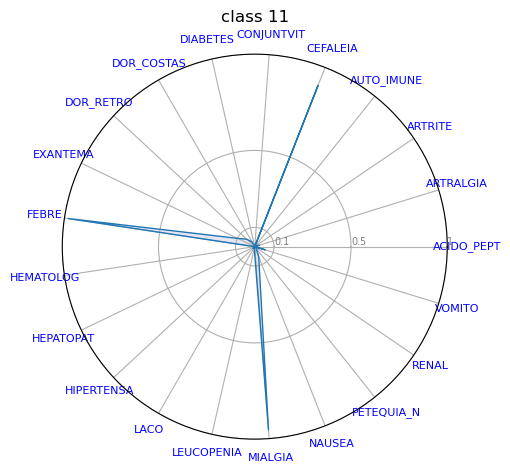

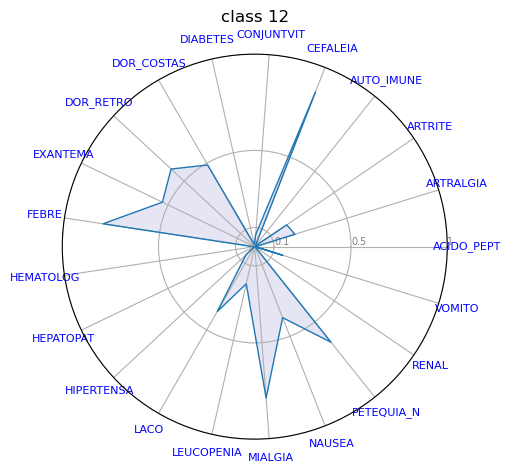

In [46]:
categories=mmdf.variable
N=len(categories)
from math import pi

for i, v in enumerate(range(13)):
    # But we need to repeat the first value to close the circular graph:
    values=mmdf[v].tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(1,figsize=(5,5), subplot_kw={'projection': 'polar'})
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='blue', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.5,1], ["0.1","0.5","1"], color="grey", size=7)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'darkblue', alpha=0.1)
    ax.set_title(f'class {v}')

    # Show the graph
    plt.savefig(f'./res/stepMix_gs/{v}_radar.png', bbox_inches='tight')
    plt.show()
    

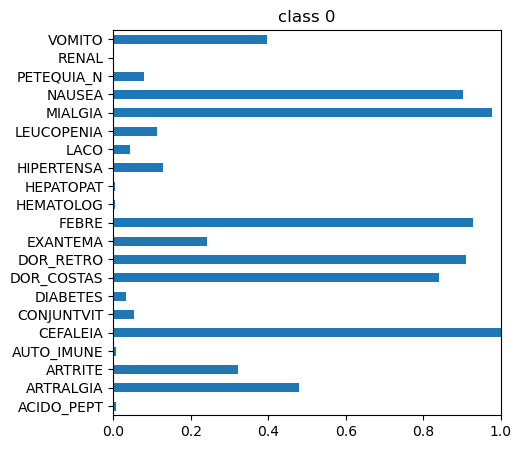

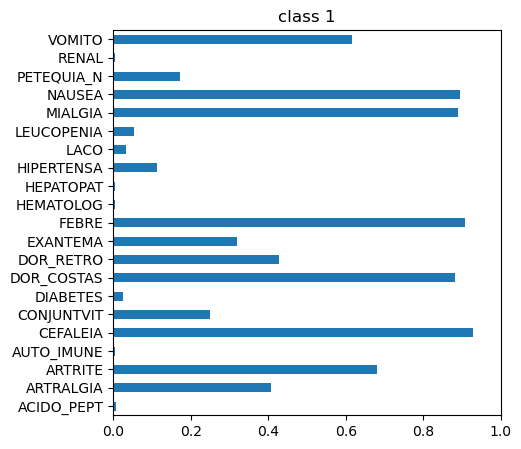

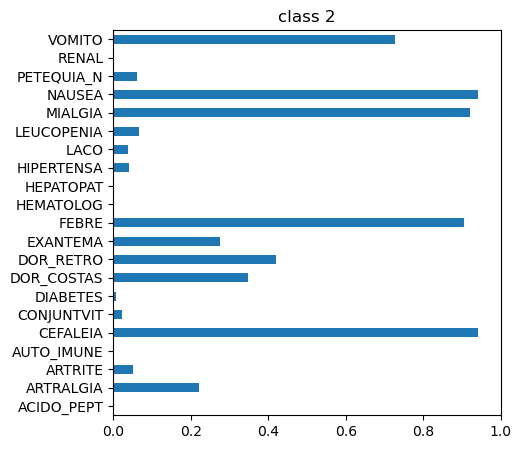

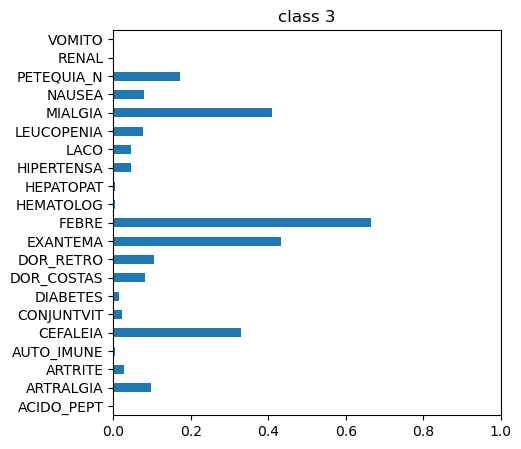

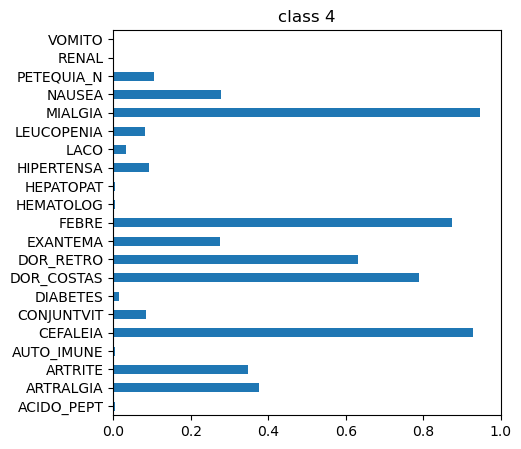

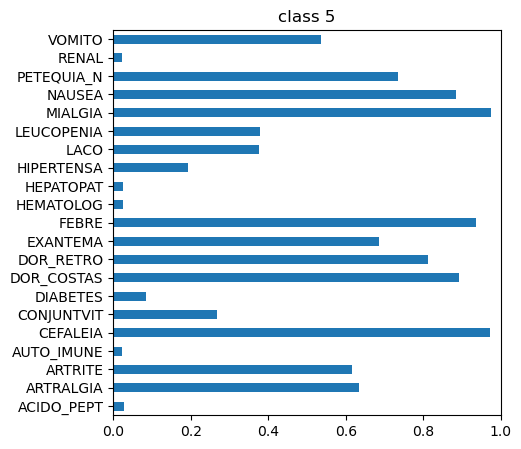

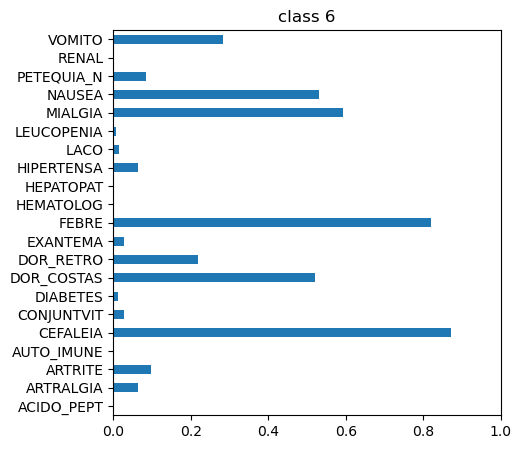

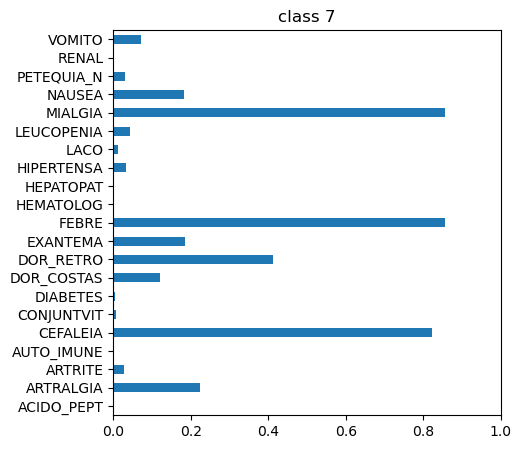

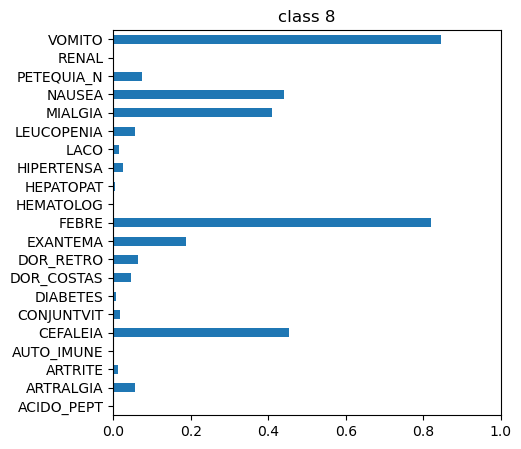

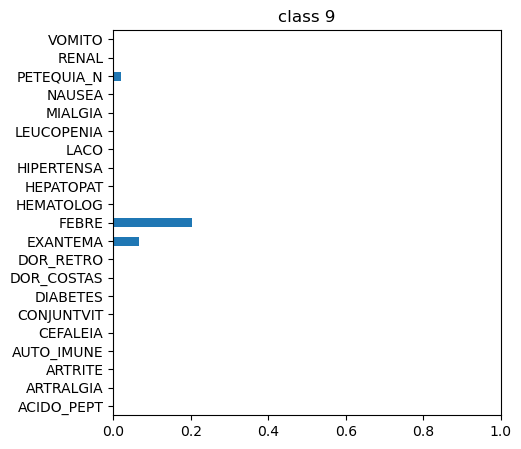

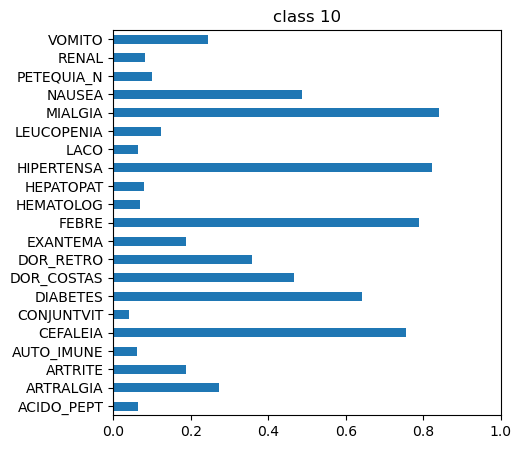

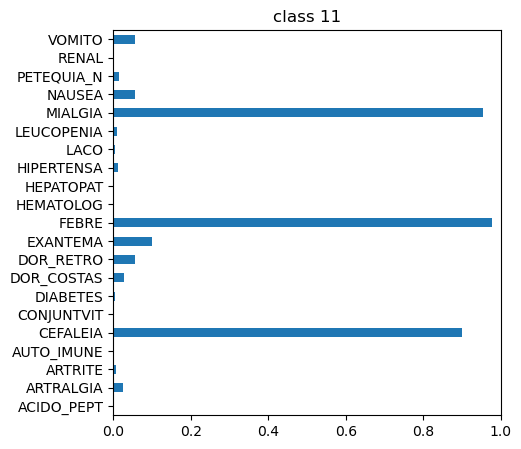

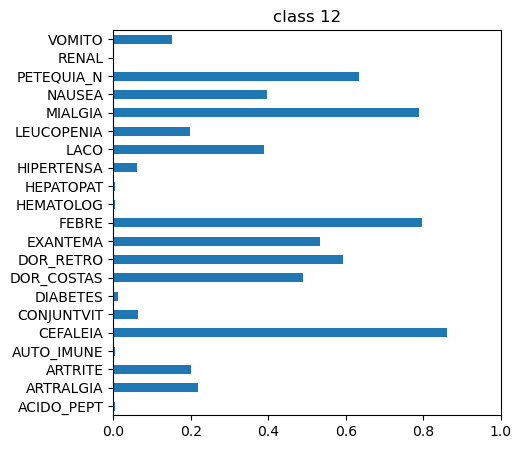

In [47]:
for i, v in enumerate(range(13)):
    fig, ax = plt.subplots(1,figsize=(5,5))
    mmdf[v].plot(kind='barh', rot=0, ax=ax,title=f'class {v}',
                                ylim=(0,21),                         
                                xlim=(0,1))
    ax.set_yticklabels(mmdf.variable)
    plt.savefig(f'./res/stepMix_gs/{v}.png', bbox_inches='tight')
    plt.show()

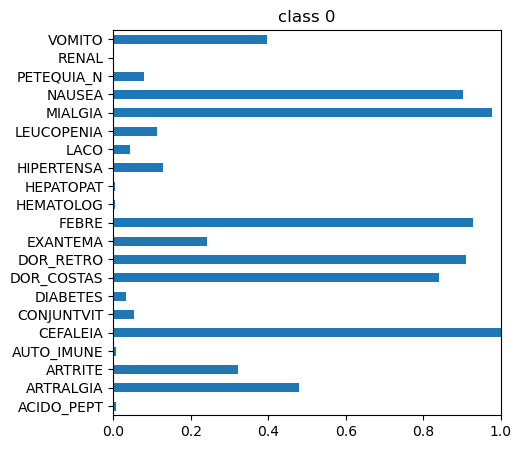

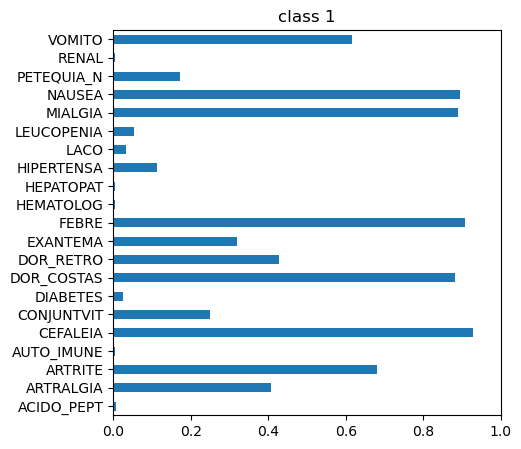

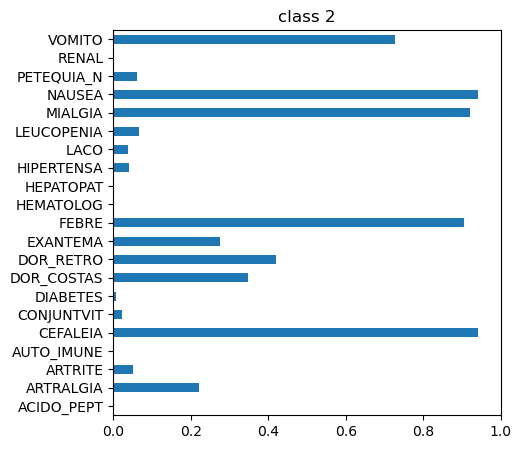

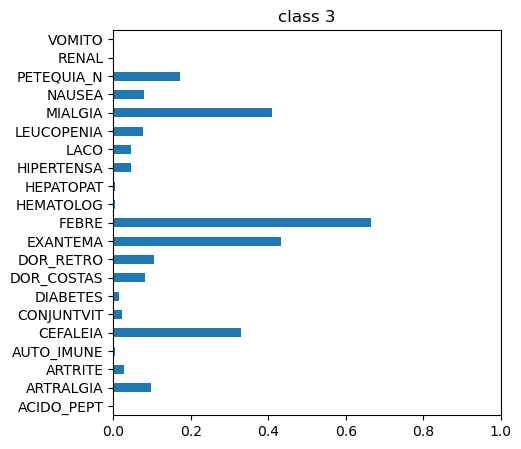

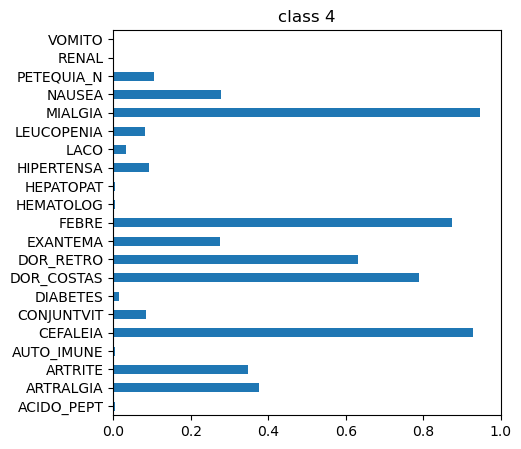

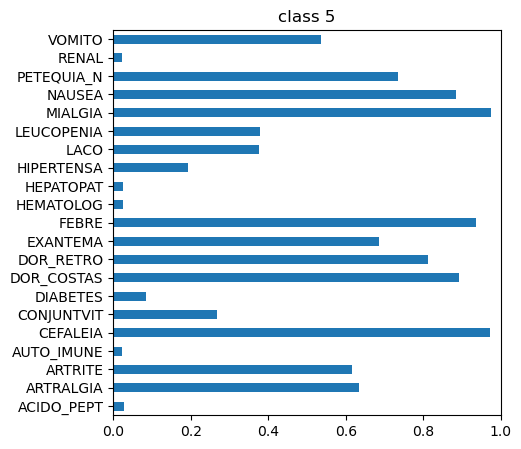

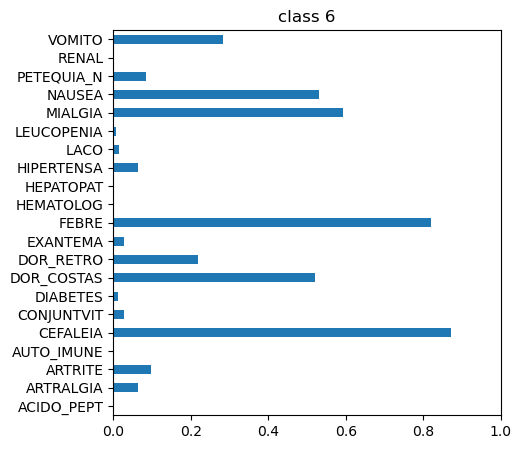

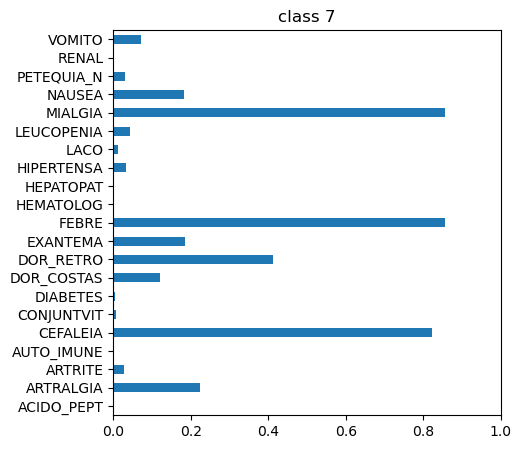

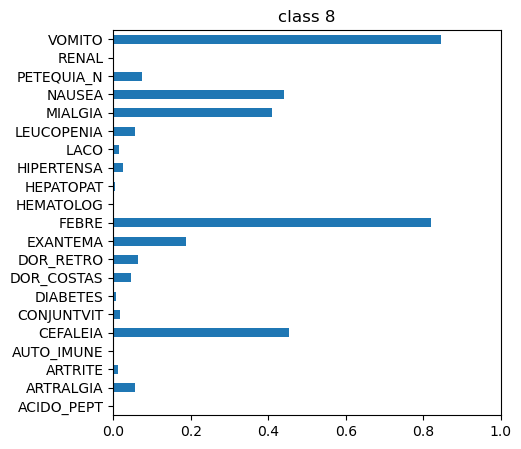

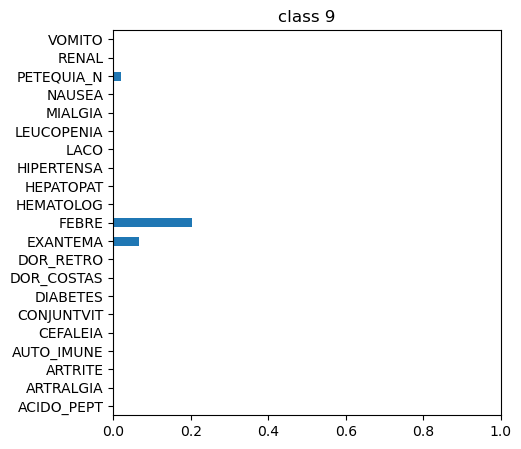

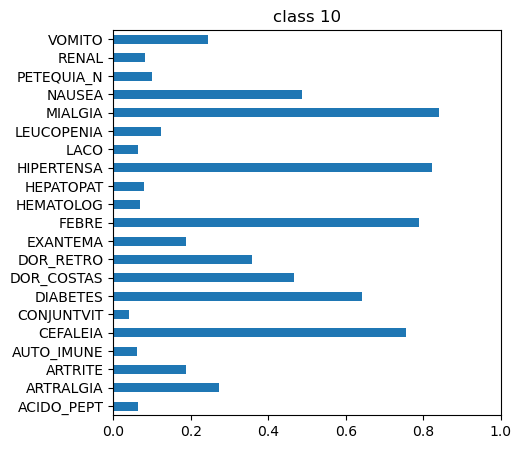

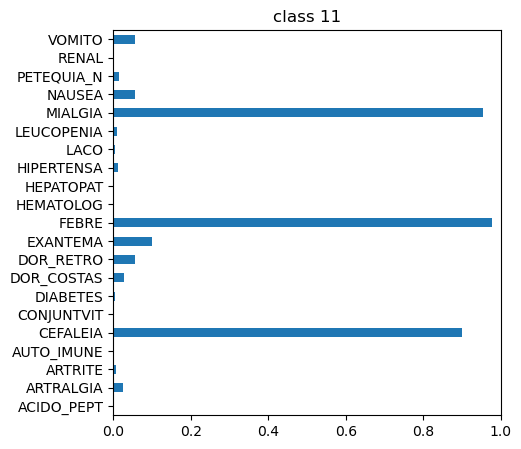

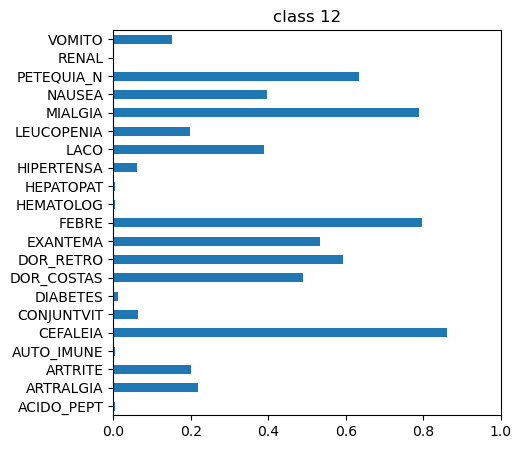

In [48]:
for i, v in enumerate(range(13)):
    fig, ax = plt.subplots(1,figsize=(5,5))
    mmdf[v].plot(kind='barh', rot=0, ax=ax,title=f'class {v}',
                                ylim=(0,21),                         
                                xlim=(0,1))
    ax.set_yticklabels(mmdf.variable)
    plt.savefig(f'./res/stepMix_gs/{v}.png', bbox_inches='tight')
    plt.show()

In [49]:
df

variable,class_no,ACIDO_PEPT,ARTRALGIA,ARTRITE,AUTO_IMUNE,CEFALEIA,CONJUNTVIT,DIABETES,DOR_COSTAS,DOR_RETRO,...,HEMATOLOG,HEPATOPAT,HIPERTENSA,LACO,LEUCOPENIA,MIALGIA,NAUSEA,PETEQUIA_N,RENAL,VOMITO
0,1,0.006908,4.076825e-01,6.818776e-01,0.005050,9.272680e-01,2.501971e-01,0.026477,0.883261,4.276391e-01,...,0.004265,0.005145,0.114072,3.229976e-02,0.054720,8.905451e-01,0.895360,0.172973,0.005089,6.152014e-01
1,2,0.002807,2.218198e-01,5.018079e-02,0.002818,9.420583e-01,2.187098e-02,0.005970,0.347877,4.191152e-01,...,0.002886,0.002936,0.041026,3.717124e-02,0.067437,9.203384e-01,0.940948,0.060576,0.001445,7.270935e-01
2,3,0.003170,9.642548e-02,2.770903e-02,0.003886,3.292415e-01,2.174007e-02,0.015544,0.082670,1.043441e-01,...,0.004000,0.003774,0.046910,4.530747e-02,0.075916,4.084656e-01,0.078414,0.173016,0.002661,9.815961e-09
3,4,0.005540,3.753259e-01,3.469312e-01,0.004895,9.285825e-01,8.432235e-02,0.016072,0.789467,6.329040e-01,...,0.004124,0.003850,0.092605,3.400117e-02,0.081882,9.471906e-01,0.278683,0.105439,0.002411,6.964236e-12
4,5,0.028271,6.350878e-01,6.167728e-01,0.023161,9.724430e-01,2.680255e-01,0.084270,0.891473,8.132275e-01,...,0.026240,0.026378,0.191851,3.761711e-01,0.378288,9.746527e-01,0.885503,0.736059,0.023822,5.367434e-01
5,6,0.002146,6.349986e-02,9.634780e-02,0.002551,8.704341e-01,2.892491e-02,0.012115,0.521254,2.179798e-01,...,0.001986,0.001920,0.064598,1.486734e-02,0.006724,5.932632e-01,0.531183,0.083735,0.002779,2.822453e-01
6,7,0.002041,2.245362e-01,2.865432e-02,0.001796,8.221410e-01,6.543521e-03,0.005741,0.120326,4.112942e-01,...,0.001575,0.001673,0.033524,1.230629e-02,0.044416,8.549534e-01,0.182426,0.029945,0.000679,7.248785e-02
7,8,0.002890,5.555717e-02,1.270561e-02,0.002008,4.524359e-01,1.733799e-02,0.007628,0.044912,6.398726e-02,...,0.003284,0.003622,0.023952,1.616387e-02,0.056536,4.097189e-01,0.440709,0.073109,0.002402,8.453572e-01
8,9,0.000540,1.000000e-15,1.000000e-15,0.000493,4.473966e-14,1.000000e-15,0.000829,0.001936,1.000000e-15,...,0.000496,0.000861,0.001540,1.000000e-15,0.000047,1.000000e-15,0.001717,0.019986,0.000239,1.000000e-15
9,10,0.064786,2.720045e-01,1.887123e-01,0.060355,7.546909e-01,4.175126e-02,0.640789,0.465650,3.573506e-01,...,0.070099,0.078304,0.823913,6.435708e-02,0.123125,8.395640e-01,0.486219,0.100174,0.082908,2.440715e-01


In [50]:
ticks=df.index
ticks

RangeIndex(start=0, stop=12, step=1)

/tmp/ipykernel_245221/1246733155.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


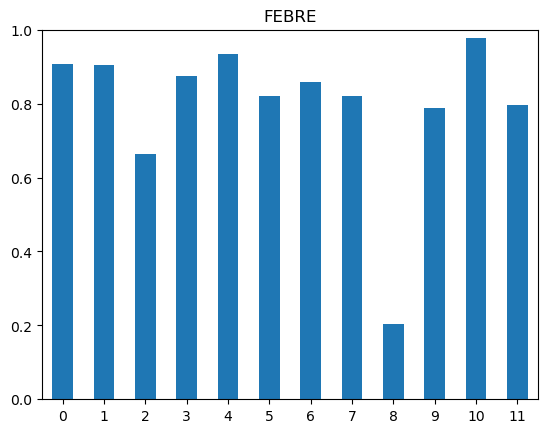

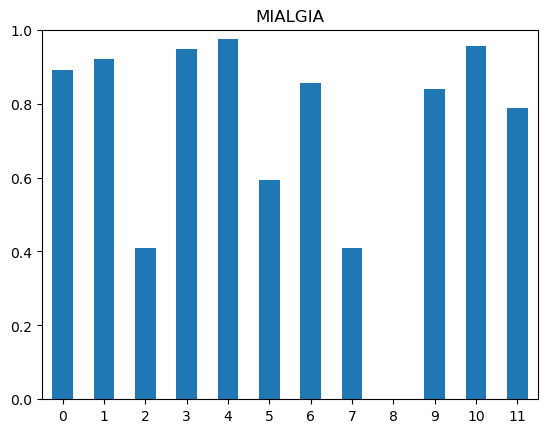

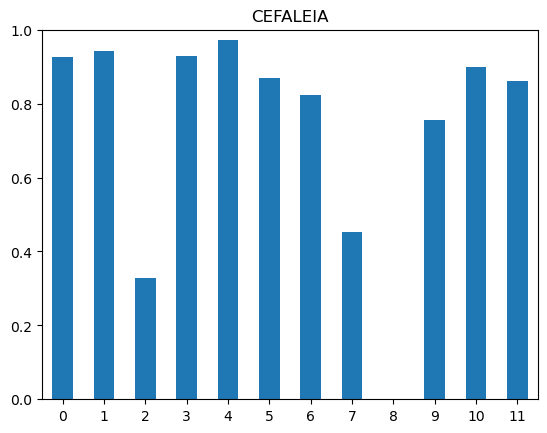

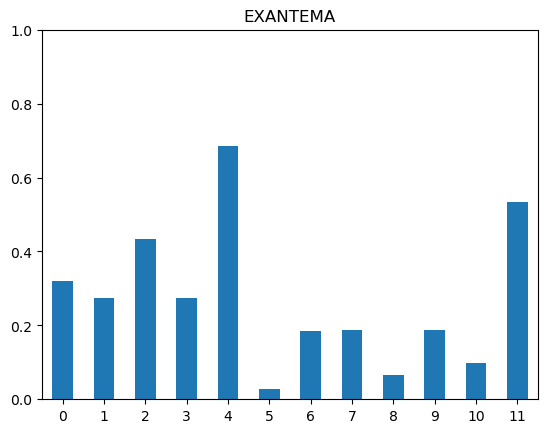

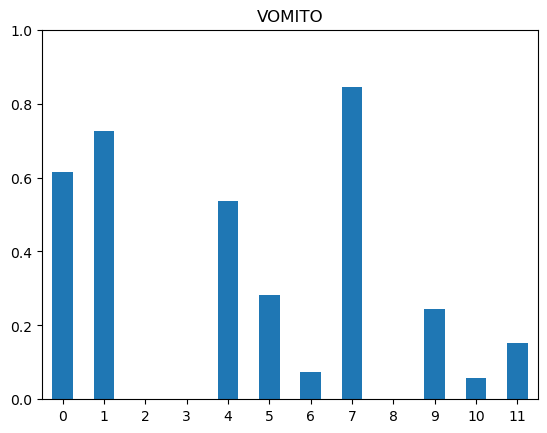

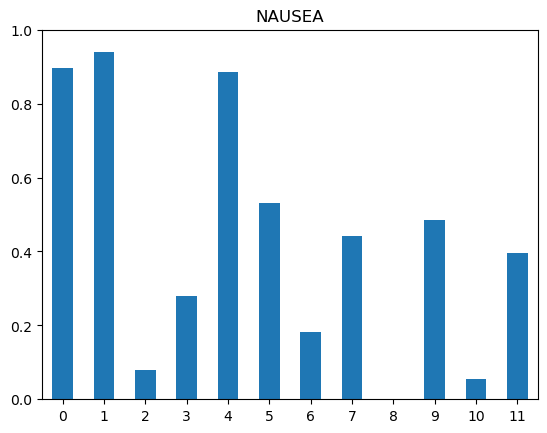

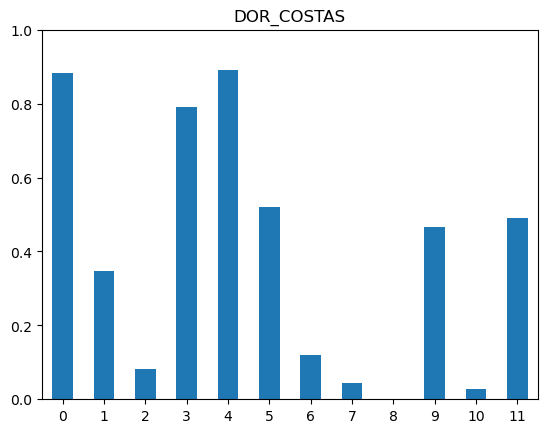

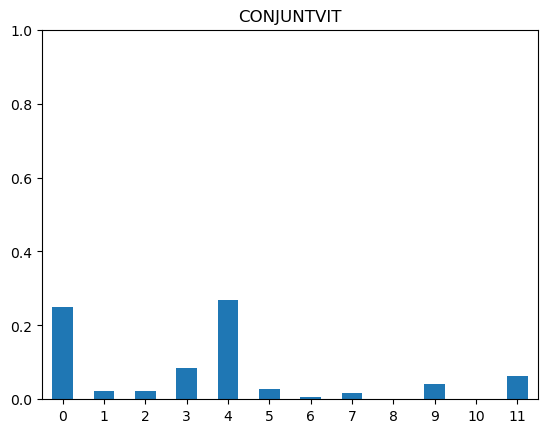

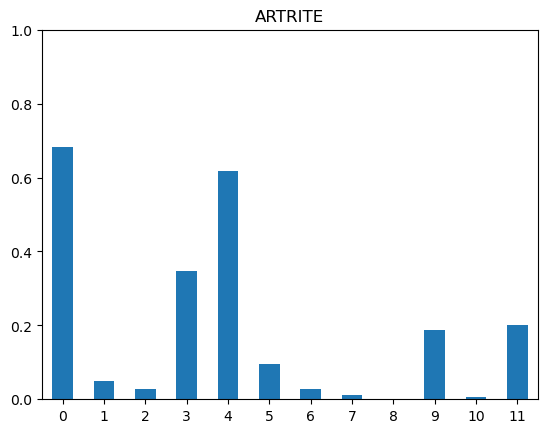

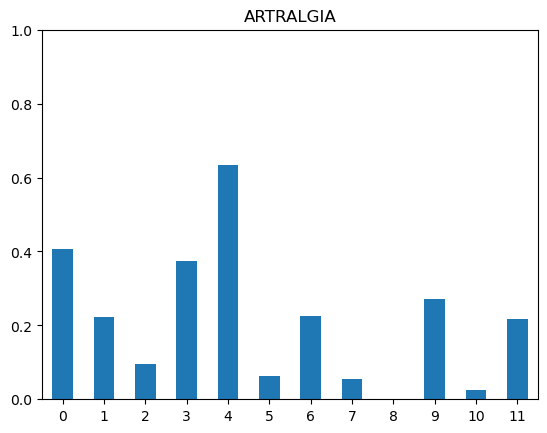

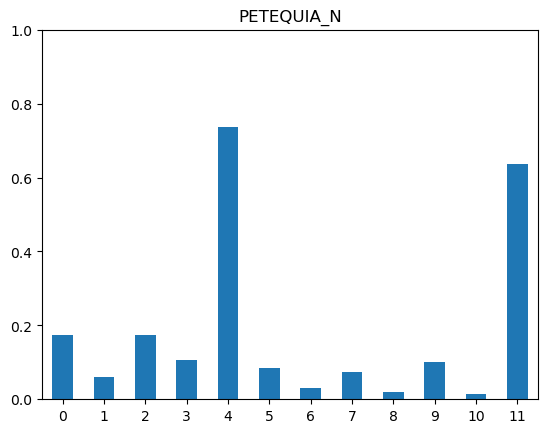

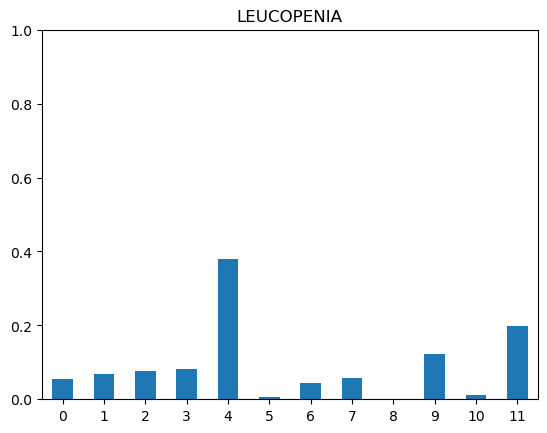

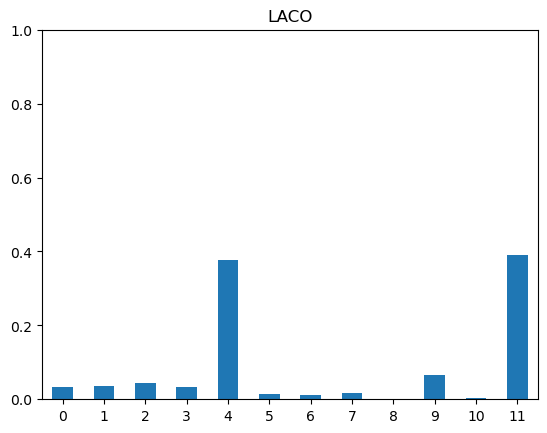

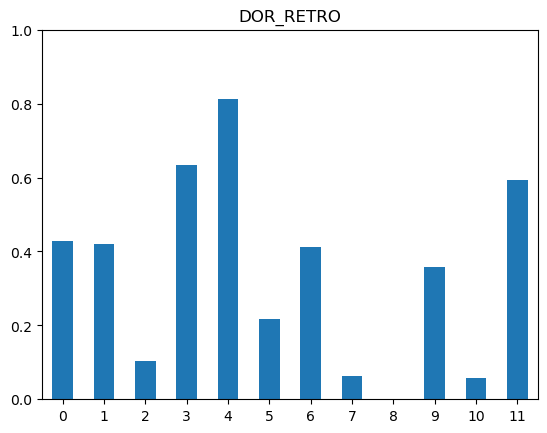

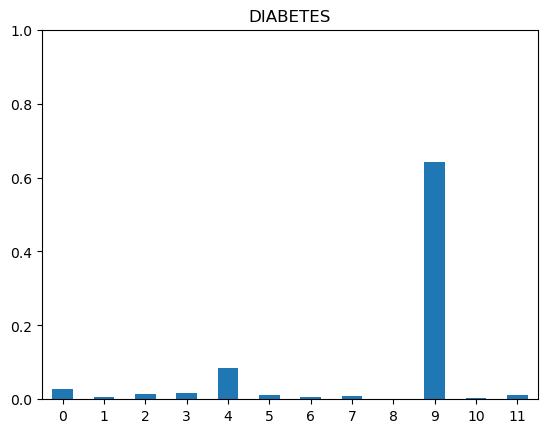

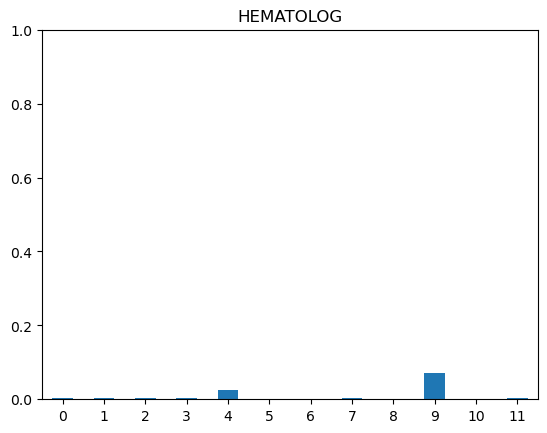

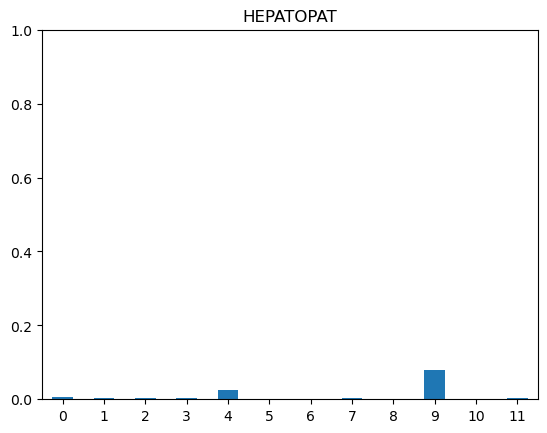

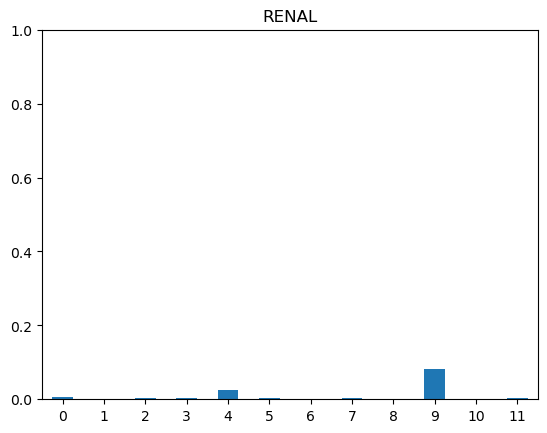

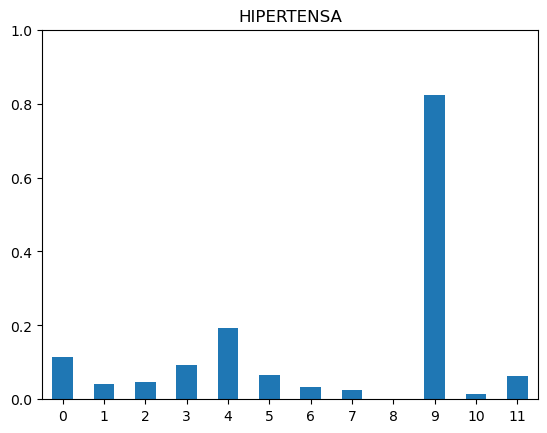

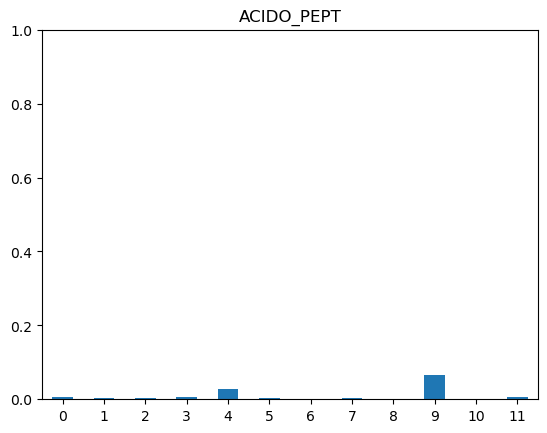

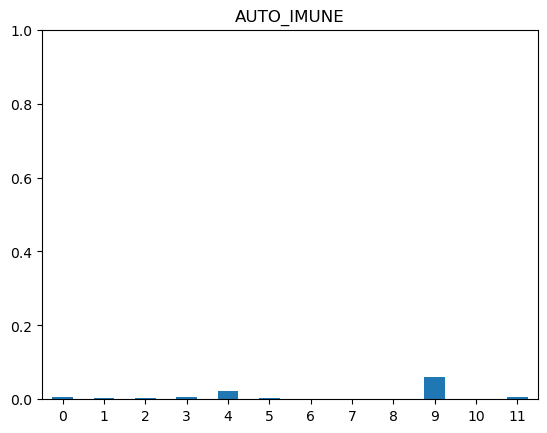

In [51]:

for i, v in enumerate(varList):
    fig=plt.figure()
    df[v].plot(kind='bar', rot=0, title=v,
                                ylim=(0,1),                         
                                xlim=(0,12),xticks=ticks)

    plt.savefig(f'./res/stepMix_gs/descbyVar_{v}.png',bbox_inches='tight')

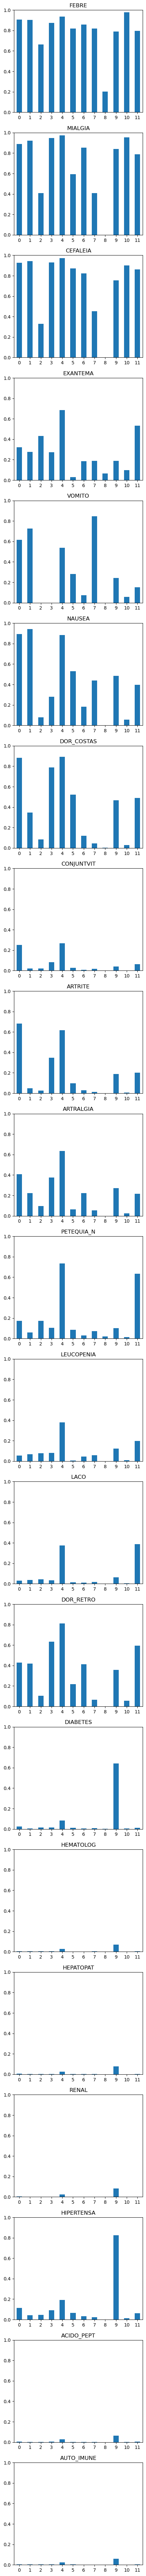

In [52]:
fig, ax = plt.subplots(len(varList),figsize=(5,100))

for i, v in enumerate(varList):
    df[v].plot(kind='bar', rot=0, ax=ax[i],title=v,
                                ylim=(0,1),                         
                                xlim=(0,12),xticks=ticks)

plt.savefig('./res/stepMix_gs/descbyVar.png',bbox_inches='tight')

In [53]:
df3['binary_pred'].value_counts()

binary_pred
7     451817
11    216098
2     140871
4     122704
0     113339
3     111675
6      85611
8      73014
9      64099
12     53008
10     41782
5      31369
1      29513
Name: count, dtype: int64

In [54]:
model_13.report(df3.loc[:,varList],df3.loc[:,'HOSPITALIZ'])

MODEL REPORT
    Measurement model parameters
          model_name        binary                                                                                                
          class_no              0       1       2       3       4       5       6       7       8       9       10      11      12
          param variable                                                                                                          
          pis   ACIDO_PEPT  0.0073  0.0069  0.0028  0.0032  0.0055  0.0283  0.0021  0.0020  0.0029  0.0005  0.0648  0.0015  0.0051
                ARTRALGIA   0.4802  0.4077  0.2218  0.0964  0.3753  0.6351  0.0635  0.2245  0.0556  0.0000  0.2720  0.0244  0.2181
                ARTRITE     0.3221  0.6819  0.0502  0.0277  0.3469  0.6168  0.0963  0.0287  0.0127  0.0000  0.1887  0.0072  0.2013
                AUTO_IMUNE  0.0073  0.0050  0.0028  0.0039  0.0049  0.0232  0.0026  0.0018  0.0020  0.0005  0.0604  0.0008  0.0057
                CEFALEIA    1.0000  0

In [55]:
model_13.report(df3.loc[:,varList])

MODEL REPORT
    Measurement model parameters
          model_name        binary                                                                                                
          class_no              0       1       2       3       4       5       6       7       8       9       10      11      12
          param variable                                                                                                          
          pis   ACIDO_PEPT  0.0073  0.0069  0.0028  0.0032  0.0055  0.0283  0.0021  0.0020  0.0029  0.0005  0.0648  0.0015  0.0051
                ARTRALGIA   0.4802  0.4077  0.2218  0.0964  0.3753  0.6351  0.0635  0.2245  0.0556  0.0000  0.2720  0.0244  0.2181
                ARTRITE     0.3221  0.6819  0.0502  0.0277  0.3469  0.6168  0.0963  0.0287  0.0127  0.0000  0.1887  0.0072  0.2013
                AUTO_IMUNE  0.0073  0.0050  0.0028  0.0039  0.0049  0.0232  0.0026  0.0018  0.0020  0.0005  0.0604  0.0008  0.0057
                CEFALEIA    1.0000  0

In [56]:
import pickle
with open('./res/stepMix_gs/model_13.pkl', 'rb') as file:
    model_13=pickle.load( file)

In [57]:
model_13.get_cw_df()

/home/tomoe/anaconda3/envs/2507DenguePy/lib/python3.13/site-packages/stepmix/stepmix.py:1234: FutureWarning: The provided callable <function mean at 0x734bec102520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


class_no,0,1,2,3,4,5,6,7,8,9,10,11,12
param,,,,,,,,,,,,,
class_weights,0.063154,0.028501,0.09638,0.085665,0.086064,0.021257,0.079808,0.263635,0.051793,0.033566,0.029361,0.119327,0.041489


# cross tab with demographics


In [58]:
from scipy.stats import chi2_contingency


In [59]:
varTestChi=['CS_SEXO','CS_GESTANT','SG_UF_NOT','CS_RACA','CS_ESCOL_N','EVOLUCAO','HOSPITALIZ','DT_INTERNA']
varNum=['NU_IDADE_N','ANO_NASC']#DT_INVEST DT_NOTIF

In [60]:
df3.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       ...
       'PLASMATICO', 'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD', 'COMPLICA',
       'TP_SISTEMA', 'NDUPLIC_N', 'CS_FLXRET', 'FLXRECEBI', 'binary_pred'],
      dtype='object', length=120)

In [61]:
chiTest=[]
crossTabs=[]

for x in varTestChi:  
    filename=f'./res/stepMix_gs/sign_comorb/c13/model_13_chisqTests_{x}.csv'
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df3['binary_pred'],df3[x]))
    print(f'{x}: p={p}')
    chiTest.append({'var':x,'chi2':chi2,'p':p,'dof':dof,'ex':ex})
    pd.DataFrame.from_dict(
        {x:['','chi-squared test','']}
    ).to_csv(filename, index=False)
    pd.DataFrame.from_dict({'var':[x],'chi2':[chi2],'p':[p],'dof':[dof]}).to_csv(
        filename,mode='a', index=False)
    proptab=pd.crosstab(df3['binary_pred'],df3[x])
    crossTabs.append(proptab)
    ex2=pd.DataFrame(ex)
    ex2.index=proptab.index
    ex2.columns=proptab.columns
    pd.DataFrame.from_dict(
        {'table':['','observed quantities','']}
    ).to_csv(filename,mode='a', index=False)
    proptab.to_csv(filename,mode='a')
    
    proptab=pd.crosstab(df3['binary_pred'],df3[x],normalize='columns')
    pd.DataFrame.from_dict(
        {'table':['','percentage by columns','']}
    ).to_csv(filename,mode='a', index=False)
    proptab.to_csv(filename,mode='a')
    pd.DataFrame.from_dict(
        {'table':['','percentage by index','']}
    ).to_csv(filename,mode='a', index=False)
    proptab=pd.crosstab(df3['binary_pred'],df3[x],normalize='index')
    proptab.to_csv(filename,mode='a')
    pd.DataFrame.from_dict(
        {'table':['','expected frequencies','']}
    ).to_csv(filename,mode='a', index=False)
    
    ex2.to_csv(filename,mode='a')
    
    
    
chi_df = pd.DataFrame(chiTest)

CS_SEXO: p=0.0
CS_GESTANT: p=0.0
SG_UF_NOT: p=0.0
CS_RACA: p=0.0
CS_ESCOL_N: p=0.0
EVOLUCAO: p=0.0
HOSPITALIZ: p=0.0
DT_INTERNA: p=6.202358289129032e-21


In [62]:
crossTabs

[CS_SEXO           F    I       M  nan
 binary_pred                          
 0             70960   61   42318    0
 1             18192   21   11300    0
 2             84094   84   56692    1
 3             59506  109   52060    0
 4             62479   72   60153    0
 5             21155   16   10198    0
 6             48969   60   36582    0
 7            239034  390  212393    0
 8             37937   80   34997    0
 9             33550  221   30328    0
 10            25655   23   16104    0
 11           109395  193  106510    0
 12            32121   35   20850    2,
 CS_GESTANT    1.0   2.0   3.0  4.0     5.0     6.0    9.0  nan
 binary_pred                                                   
 0             316   420   292  186   55914   50103   6097   11
 1             116   126    98   65   13639   13807   1651   11
 2             565   568   443  232   58456   70523  10062   22
 3             404   589   645  117   29471   71869   8558   22
 4             269   403   352

In [63]:
chi_df.to_csv('./res/stepMix_gs/sign_comorb/c13/model_13_chisqTests.csv')